In [4]:
import pandas as pd
import os
import string
import re
import numpy as np
from nltk.stem import WordNetLemmatizer
import nltk
import pickle
print('NLTK (DOWNLOAD ALL PACKAGES TO PERFORM NLP OPERATION)')

print('UNCOMMENT FOLLOWING LINE To GET NLTK DOWNLOADED')
# nltk.download('all')
stopword = nltk.corpus.stopwords.words('english')
wordnet_lemmatizer = WordNetLemmatizer()


NLTK (DOWNLOAD ALL PACKAGES TO PERFORM NLP OPERATION)
UNCOMMENT FOLLOWING LINE To GET NLTK DOWNLOADED


In [2]:
!wget http://7c4292c7e0ca.ngrok.io/data.zip

--2020-08-26 10:19:46--  http://7c4292c7e0ca.ngrok.io/data.zip
Resolving 7c4292c7e0ca.ngrok.io (7c4292c7e0ca.ngrok.io)... 3.13.191.225, 2600:1f16:d83:1201::6e:1
Connecting to 7c4292c7e0ca.ngrok.io (7c4292c7e0ca.ngrok.io)|3.13.191.225|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94790330 (90M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]  90.40M   457KB/s    in 2m 43s  

2020-08-26 10:22:31 (568 KB/s) - ‘data.zip’ saved [94790330/94790330]



In [5]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/enron_05_17_2015_with_labels_v2_100K_chunk_1_of_6.csv  
  inflating: tfidf_content.pickle    
  inflating: tfidf_subject.pickle    


In [6]:
def preprocess(df):
    
    df = df[df.columns.drop(list(df.filter(regex='^Cat')))]
    df = df[df['Date'] != '27/06/2001']  #removing the date
    df = df[(df['Subject'] != 'RE:') & (df['Subject'] != 'FW:') & (df['Subject'] != 'Re:')]  #removing the max same subjects
    del df['Unnamed: 0']
    return df

In [7]:
stopword.append('re')
stopword.append('fw')

In [8]:
def clean_text(text):
    text_nopunct = "".join([char for char in text.lower() if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct) #tokenize
    words_without_stopwords = [word for word in tokens if word not in stopword] #remove stopwords from tokens
    return [wordnet_lemmatizer.lemmatize(word, pos="v") for word in words_without_stopwords]

In [9]:
DATA = 'data' #https://data.world/brianray/enron-email-dataset

FILENAMES = [os.path.join(DATA, filename) for filename in os.listdir(DATA)]
df = pd.read_csv('data/enron_05_17_2015_with_labels_v2_100K_chunk_1_of_6.csv')
df = preprocess(df)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df = df[df['Subject'].notna()]
df = df[df['content'].notna()]
df[df['content'].isna()].shape

(0, 15)

In [11]:

dfEmail = df[['Subject', 'content']]
dfEmail.head()

,Subject,content
2,Re: test,test successful. way to go!!!
4,Re: Hello,Let's shoot for Tuesday at 11:45.
5,Re: Hello,"Greg, How about either next Tuesday or Thursda..."
7,Re: PRC review - phone calls,any morning between 10 and 11:30
8,Re: High Speed Internet Access,1. login: pallen pw: ke9davis I don't think th...


In [12]:
content_vecotrizer = pickle.load(open('tfidf_content.pickle', "rb"))
subject_vecotrizer = pickle.load(open('tfidf_subject.pickle', "rb"))
print('Vectorizer Loaded!!')

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfTransformer from version 0.20.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Vectorizer Loaded!!


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 0.20.3 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [13]:
subject_matrix = subject_vecotrizer.transform(df['Subject'])

In [14]:
dfSubject = pd.DataFrame(subject_matrix.toarray(), columns=subject_vecotrizer.get_feature_names())

In [15]:
dfSubject.head()

,,0,00,000,00000000000000000000000000000000000weil,000000000055936,000000000078904,0000105674,0000108727,0000110257,...,zipter,zombie,zonal,zone,zooey,zoomerang,zpro,zulie,zycher,zykorie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
content_matrix = content_vecotrizer.transform(df['content'])

combine **subject** and **content** tfidf matrix

In [18]:
type(content_matrix)

scipy.sparse.csr.csr_matrix

In [19]:
import scipy.sparse as sp

a = sp.csr_matrix([[1,2,3],[4,5,6]])
print("a")
print(a.toarray())
print("b")
b = sp.csr_matrix([[7,8,9],[10,11,12]])
print(b.toarray())
print("c")
c = sp.hstack((a,b))  # NOT np.vstack
print(c.toarray())


a
[[1 2 3]
 [4 5 6]]
b
[[ 7  8  9]
 [10 11 12]]
c
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


In [20]:
matrix =  sp.hstack((subject_matrix,content_matrix))

In [21]:
#Use KMeans clustering from scikit-learn
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 


In [22]:
#Find optimal cluster size by finding sum-of-squared-distances

sosd = []
#Run clustering for sizes 1 to 15 and capture inertia
K = range(5,30)
for k in K:
    km = KMeans(n_clusters=k, n_jobs=-1) #-1 will use all cores of CPU for computation
    km = km.fit(matrix)
    sosd.append(km.inertia_)
    print(str(k) + "processed")
    
print("Sum of squared distances : " ,sosd)


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


5processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


6processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


7processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


8processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


9processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


10processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


11processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


12processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


13processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


14processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


15processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


16processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


17processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


18processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


19processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


20processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


21processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


22processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


23processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


24processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


25processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


26processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


27processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


28processed


/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


29processed
Sum of squared distances :  [178620.94650164773, 178278.4630423151, 177685.27674958092, 177551.77253628473, 177029.8169985968, 176837.64730720592, 176257.39255221692, 176354.51790539105, 175894.37274098967, 175643.53849049233, 175262.50465604875, 175135.23809022145, 174997.30214409364, 174677.25716502828, 174527.57580919398, 174284.90869338592, 174013.91415649062, 173862.71711781292, 173654.28740838013, 173438.11826969308, 173225.248837218, 173008.08392906573, 172735.0041312859, 172829.11765569274, 172401.8110461639]


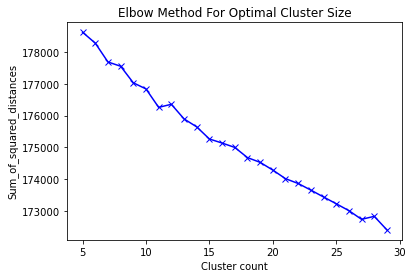

In [23]:

#Plot sosd against number of clusters
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(K, sosd, 'bx-')
plt.xlabel('Cluster count')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal Cluster Size')
plt.show()

In [24]:
#Split data into 9 clusters
kmeans = KMeans(n_clusters=11, n_jobs=-1).fit(matrix)

#get Cluster labels.
clusters= kmeans.labels_

/opt/conda/lib/python3.7/site-packages/sklearn/cluster/_kmeans.py:939: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  " removed in 0.25.", FutureWarning)


In [25]:
clusters.shape

(91370,)

In [26]:
len(set(clusters))

11

In [27]:
pickle.dump(kmeans, open("kmeans.pkl", "wb"))

In [28]:
import os
os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'kmeans.pkl')

/kaggle/working/kmeans.pkl

In [29]:
dfEmail.shape

(91370, 2)

In [30]:
dfEmail['cluster'] = clusters

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [31]:
dfEmail.head()

,Subject,content,cluster
2,Re: test,test successful. way to go!!!,7
4,Re: Hello,Let's shoot for Tuesday at 11:45.,7
5,Re: Hello,"Greg, How about either next Tuesday or Thursda...",7
7,Re: PRC review - phone calls,any morning between 10 and 11:30,5
8,Re: High Speed Internet Access,1. login: pallen pw: ke9davis I don't think th...,7


> Need to analyze this clusters and then label them according to our conclusion for that cluster.

In [32]:
dfEmail['Subject'] = dfEmail['Subject'].apply(lambda x: clean_text(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfEmail['content'] = dfEmail['content'].apply(lambda x: clean_text(x))

In [ ]:
pd.set_option('max_colwidth', 800)
dfEmail[dfEmail['cluster'] == 0].head(20)

In [59]:
dfEmail[dfEmail['cluster'] == 1].head(20)

,Subject,content,cluster
9,"[fw, fix, forward, collar, floor, gas, price, term]","[, forward, phillip, k, allenhouect, 10162000, 0142, pm, buckner, buck, buckbucknerhoneywellcom, 10122000, 011221, pm, pallenenroncom, pallenenroncom, cc, subject, fw, fix, forward, collar, floor, gas, price, term, phillip, discuss, phone, conversation, parallon, 75, microturbine, power, generation, deal, national, account, customer, develop, proposal, sell, power, customer, fix, collarfloor, price, need, correspond, term, gas, price, microturbine, onsite, generation, product, develop, honeywell, generate, electricity, customer, site, degen, use, natural, gas, need, best, fix, price, forward, gas, price, deal, 1, 3, 5, 7, 10, years, annualseasonal, supply, microturbines, generate, fix, kwh, customer, opportunity, sell, customer, kwh, use, microturbine, sell, turbines, kwh, deal, must, ...",1
10,"[fw, fix, forward, collar, floor, gas, price, term]","[mr, buckner, deliver, gas, behind, san, diego, enron, energy, service, appropriate, enron, entity, forward, request, zarin, imam, ees, phone, number, 7138537107, phillip, allen]",1
310,"[fw, trade, track, program]","[think, chad, deserve, interview]",1
333,"[fw, sanjuansocal, spread, price]","[thank, help]",1
391,"[fw, 1099, tax, question, answer]","[, forward, phillip, k, allenhouect, 03132001, 0400, pm, benotti, stephen, 03132001, 125824, pm, pallenenroncom, pallenenroncom, cc, subject, fw, 1099, tax, question, answer, notice, regard, entry, order, instructions, please, transmit, order, andor, instructions, regard, painewebber, account, email, order, andor, instructions, transmit, email, accept, painewebber, painewebber, responsible, carry, order, andor, instructions, notice, regard, privacy, confidentiality, painewebber, reserve, right, monitor, review, content, email, communications, send, andor, receive, employees, 1494, filepdf]",1
405,"[fw, cross, commodity]","[john, put, frank, hayden, decision, would, 20, consider, authorize, mike, g, frank, e, keith, h, trade, west, 20, power, think, phillip, forward, phillip, k, allenhouect, 03062001, 20, 1048, frank, haydenenronenronxgate, 03052001, 0927, cst, phillip, k, allenhouectect, cc, 20, subject, fw, cross, commodity, original, message, hayden, frank, 20, send, friday, march, 02, 2001, 701, pm, presto, kevin, zufferli, john, mckay, jonathan, belden, tim, shively, 20, hunter, neal, scott, martin, thomas, allen, phillip, arnold, john, subject, cross, commodity, importance, high, i01ve, ask, provide, update, list, authorize, cross, 20, trade, commoditiesproducts, soon, possible, please, reply, 20, email, name, authorize, 01cross, commodity018, traders, and20, ...]",1
430,"[fw, change, agroup, cycle, schedule]","[spin, bike, much, better, life, cycle, would, consider, place, several, spin, bike, exercise, equipment, run, spin, video, tvs, think, equipment, would, use, much, members, could, jump, bike, follow, video, time, day, let, know, possible, phillip, allen, x37041]",1
929,"[fw, trade, track, program]","[think, chad, deserve, interview]",1
952,"[fw, sanjuansocal, spread, price]","[thank, help]",1
1013,"[fw, 1099, tax, question, answer]","[, forward, phillip, k, allenhouect, 03132001, 0400, pm, benotti, stephen, 03132001, 125824, pm, pallenenroncom, pallenenroncom, cc, subject, fw, 1099, tax, question, answer, notice, regard, entry, order, instructions, please, transmit, order, andor, instructions, regard, painewebber, account, email, order, andor, instructions, transmit, email, accept, painewebber, painewebber, responsible, carry, order, andor, instructions, notice, regard, privacy, confidentiality, painewebber, reserve, right, monitor, review, content, email, communications, send, andor, receive, employees, 1494, filepdf]",1


In [60]:
dfEmail[dfEmail['cluster'] == 2].head(20)

,Subject,content,cluster
69,"[western, gas, market, report, draft]","[richard, compare, california, production, number, 2000, california, gas, report, show, 410, might, two, utilities, receive]",2
76,"[security, request, clog4nnjez, deny]","[request, come]",2
83,"[request, steve, kean]","[alan, receive, update, number, keith, holst, call, receive, phillip]",2
94,"[request, steve, kean]","[, forward, phillip, k, allenhouect, 04302001, 1121, alan, comnes, 04272001, 0138, pm, phillip, k, allenhouectect, cc, joe, hartsoecorpenronenron, subject, request, steve, kean, phillip, get, request, gas, side, think, keanlay, need, update, table, prepare, months, ago, ive, attach, oblige, thank, alan, comnes, forward, alan, comnespdxect, 04272001, 0142, pm, janel, guerreroenron, 04272001, 1244, pm, alan, comnespdxectect, jeff, dasovichnaenronenron, cc, paul, kaufmanpdxectect, richard, shapironaenronenron, subject, request, steve, kean, alan, steve, ask, update, power, point, reflect, stupid, regulatorylegislative, decisions, since, begin, year, ken, want, update, chart, brief, book, next, weeks, ken, lay, tour, ca, also, want, forward, price, curve, gas, power, ca, get, three, ...]",2
97,"[daily, report]","[, forward, phillip, k, allenhouect, 08202000, 0538, pm, lucy, gonzalez, stagecoachmamahotmailcom, 08162000, 024436, pm, pallenenroncom, cc, subject, daily, report, phillip, ac, buy, today, 17, cost, 16671, pd, ck1429, 81600, walmartalso, 81500, ralphs, appliance, centerck1428, frig, stave, apt, 20b, ivoice, 000119, amt30856, stove15000, frig12500del, chrg1500tax1856, total30856fax, machine, ffice, ck, 142710825, steelman, office, produc, ts, thanxs, lucy, get, private, free, email, msn, hotmail, httpwwwhotmailcom]",2
98,"[daily, report]","[, forward, phillip, k, allenhouect, 08202000, 0538, pm, lucy, gonzalez, stagecoachmamahotmailcom, 08172000, 023755, pm, pallenenroncom, cc, subject, daily, report, phillip, today, one, days, wade, go, pay, fine, go, take, take, alot, time, scheduleif, get, chance, mention, need, try, fix, van, tht, go, get, ever, need, tomorrow, gary, go, herei, go, iwill, email, tomorrow, lucy, get, private, free, email, msn, hotmail, httpwwwhotmailcom]",2
104,"[approval, request]","[stephanie, please, grant, paul, request, eol, right, thank, phillip]",2
105,"[request, steve, kean]","[, forward, phillip, k, allenhouect, 04302001, 1036, alan, comnes, 04272001, 0138, pm, phillip, k, allenhouectect, cc, joe, hartsoecorpenronenron, subject, request, steve, kean, phillip, get, request, gas, side, think, keanlay, need, update, table, prepare, months, ago, ive, attach, oblige, thank, alan, comnes, forward, alan, comnespdxect, 04272001, 0142, pm, janel, guerreroenron, 04272001, 1244, pm, alan, comnespdxectect, jeff, dasovichnaenronenron, cc, paul, kaufmanpdxectect, richard, shapironaenronenron, subject, request, steve, kean, alan, steve, ask, update, power, point, reflect, stupid, regulatorylegislative, decisions, since, begin, year, ken, want, update, chart, brief, book, next, weeks, ken, lay, tour, ca, also, want, forward, price, curve, gas, power, ca, get, three, ...]",2
111,"[approval, overdue, access, request, paultluccienroncom]","[ina, many, time, think, jeff, want, get, message, please, help, phillip, forward, phillip, k, allenhouect, 08082000, 0430, pm, jeffrey, shankman, 08082000, 0559, phillip, k, allenhouectect, cc, paul, luccidenectenron, subject, approval, overdue, access, request, paultluccienroncom, please, phillip, john, l, approve, thank, jeff, forward, jeffrey, shankmanhouect, 08082000, 0748, arsystemectenroncom, 08072000, 070323, pm, jeffreyashankmanenroncom, cc, subject, approval, overdue, access, request, paultluccienroncom, request, pending, approval, 8, days, please, click, jeffreyashankmanenroncom, approve, request, contact, irm, 7138535536, issue, request, id, 000000000000935, request, create, date, 72700, 21523, pm, request, paultluccienroncom, resource, name, eol, us, natgas, us, gas, phy, ...",2
11

In [61]:
dfEmail[dfEmail['cluster'] == 6].head(20)

,Subject,content,cluster
7,"[prc, review, phone, call]","[morning, 10, 1130]",6
283,"[western, wholesale, activities, gas, power, conf, call]","[guy, coordinate, make, sure, someone, listen, conference, call, week, tara, fundamental, group, record, call, happen, every, day, phillip, forward, phillip, k, allenhouect, 05072001, 0726, jam, steffesenron, 05032001, 0544, phillip, k, allenhouectect, cc, subject, western, wholesale, activities, gas, power, conf, call, privilege, confidential, communication, attorneyclient, communication, attorney, work, product, privilege, assert, please, forward, anyone, team, want, update, western, wholesale, matter, also, give, opportunity, raise, state, matter, want, discuss, jim, forward, jam, steffesnaenron, 05032001, 0742, ray, alvarez, 05022001, 0540, pm, steve, waltonhouectect, susan, j, maranaenronenron, alan, comnespdxectect, leslie, lawnernaenronenron, rebecca, w, cantrellhouectect, donna...",6
285,"[western, wholesale, activities, gas, power, conf, call]","[, forward, phillip, k, allenhouect, 05042001, 1015, jam, steffesenron, 05032001, 0544, phillip, k, allenhouectect, cc, subject, western, wholesale, activities, gas, power, conf, call, privilege, confidential, communication, attorneyclient, communication, attorney, work, product, privilege, assert, please, forward, anyone, team, want, update, western, wholesale, matter, also, give, opportunity, raise, state, matter, want, discuss, jim, forward, jam, steffesnaenron, 05032001, 0742, ray, alvarez, 05022001, 0540, pm, steve, waltonhouectect, susan, j, maranaenronenron, alan, comnespdxectect, leslie, lawnernaenronenron, rebecca, w, cantrellhouectect, donna, fultoncorpenronenron, jeff, dasovichnaenronenron, christi, l, nicolayhouectect, jam, steffesnaenronenron, jalexandergibbsbrunscom, phil...",6
426,"[daily, california, call, move, weekly, call]","[, forward, phillip, k, allenhouect, 02212001, 0336, pm, jam, steffesenron, 02212001, 1207, pm, cst, alan, comnespdxectect, chris, h, fosterhouectect, christian, yoderhouectect, christopher, f, calgerpdxectect, dan, leffhoueesees, david, w, delaineyhouectect, dennis, benevideshoueesees, blackhoueesees, elizabeth, sagerhouectect, elizabeth, tilneyhoueesees, eric, thodecorpenronenron, gordon, savagehoueesees, greg, wolfehouectect, harry, kingerskinaenronenron, jubran, whalanhoueesees, jeff, dasovichnaenronenron, jeffrey, hodgehouectect, joe, hartsoecorpenronenron, john, j, lavoratocorpenronenron, john, kathryn, corballycorpenronenron, keith, holsthouectect, kristin, walshhouectect, leslie, lawnernaenronenron, linda, robertsonnaenronenron, louise, kitchenhouectect, marcia, lintonnaenronen...",6
552,"[call, saturday]","[larry, 10, tomorrow, good, want, email, anything, tonight, please, use, pallen70hotmailcom, phillip]",6
567,"[western, wholesale, activities, gas, power, conf, call, privilege, confidential, communication, attorneyclient, communication, attorney, work, product, privilege, assert]","[guy, coordinate, make, sure, someone, listen, conference, call, week, tara, fundamental, group, record, call, happen, every, day, phillip, forward, phillip, k, allenhouect, 05072001, 0726, jam, steffesenron, 05032001, 0544, phillip, k, allenhouectect, cc, subject, western, wholesale, activities, gas, power, conf, call, privilege, confidential, communication, attorneyclient, communication, attorney, work, product, privilege, assert, please, forward, anyone, team, want, update, western, wholesale, matter, also, give, opportunity, raise, state, matter, want, discuss, jim, forward, jam, steffesnaenron, 05032001, 0742, ray, alvarez, 05022001, 0540, pm, steve, waltonhouectect, susan, j, maranaenronenron, alan, comnespdxectect, leslie, lawnernaenronenron, rebecca, w, cantrellhouectect, donna...",6
591,"[western, wholesale, activities, gas, power, conf, call, privilege, confidential, communication, attorneyclient, communication, attorney, work, product, privilege, assert]","[, forward, phillip, k, allenhouect, 050